In [10]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [11]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, SVM and Logistic Regresion


Random Forest Feature Selection:


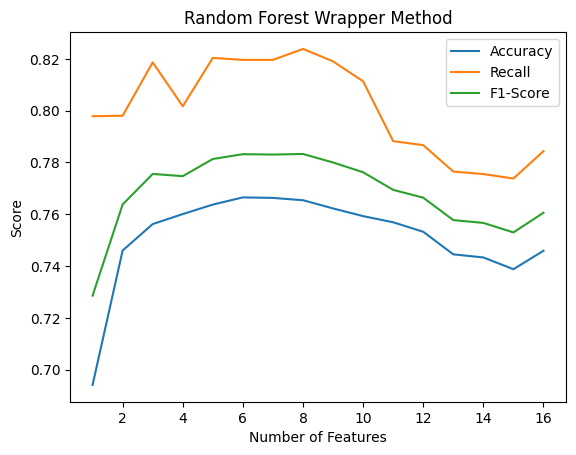


KNN Feature Selection:


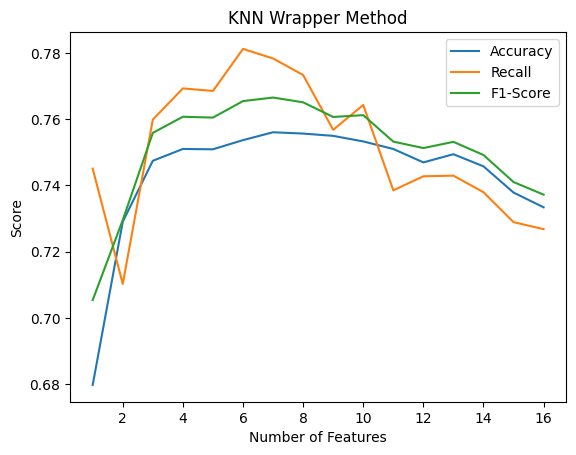


Logistic Regression Feature Selection:


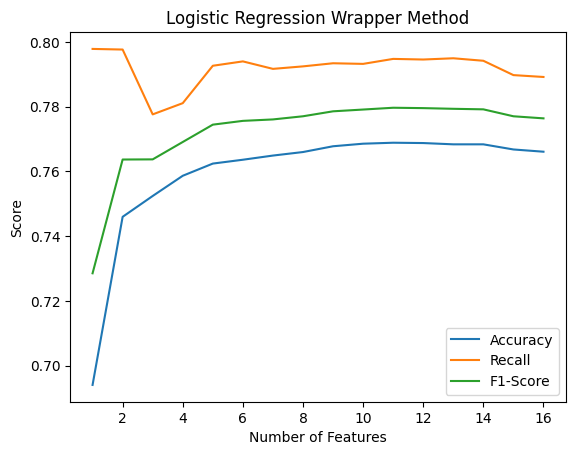

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np

# Define your models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=12),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42)
}

# Evaluate the features chosen
def evaluate_model(model, features):
    model.fit(x_train.iloc[:, features], y_train)
    predictions = model.predict(x_test.iloc[:, features])
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, recall, f1

selected_models = []
# Wrapper method
for model_name, model in models.items():
    print(f"\n{model_name} Feature Selection:")
    selected_features = []
    accuracy_list = []
    recall_list = []
    f1_list = []

    while len(selected_features) < x_train.shape[1]:
        best_accuracy = 0
        best_recall = 0
        best_f1 = 0
        best_feature = None

        for feature_index in range(x_train.shape[1]):
            if feature_index not in selected_features:
                current_features = selected_features + [feature_index]
                accuracy, recall, f1 = evaluate_model(model, current_features)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_recall = recall
                    best_f1 = f1
                    best_feature = feature_index

        selected_features.append(best_feature)
        accuracy_list.append(best_accuracy)
        recall_list.append(best_recall)
        f1_list.append(best_f1)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.plot(np.arange(1, x_train.shape[1] + 1), accuracy_list, label='Accuracy')
    plt.plot(np.arange(1, x_train.shape[1] + 1), recall_list, label='Recall')
    plt.plot(np.arange(1, x_train.shape[1] + 1), f1_list, label='F1-Score')
    plt.xlabel('Number of Features')
    plt.ylabel('Score')
    plt.title(f'{model_name} Wrapper Method')
    plt.legend()
    plt.show()

    # Append the model with unique name
    selected_models.append((f'{model_name} - {len(selected_models)}', model, selected_features))

Stacking

Stacking Classifier Metrics:
Accuracy: 0.7680800475530017
Recall: 0.7945706584520601
F1 Score: 0.7790467201510146


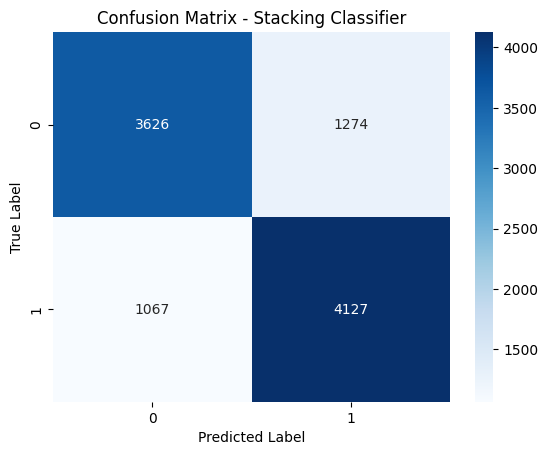

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a StackingClassifier
estimators = [(name, model) for name, model, _ in selected_models]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))

# Fit the StackingClassifier on the training data
stacking_model.fit(x_train, y_train)

# Make predictions for the test data
y_pred_stacking = stacking_model.predict(x_test)

# Calculate evaluation metrics for stacking
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

# Print the metrics for stacking
print("Stacking Classifier Metrics:")
print("Accuracy:", accuracy_stacking)
print("Recall:", recall_stacking)
print("F1 Score:", f1_stacking)

# Plot the confusion matrix
sns.heatmap(conf_matrix_stacking, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()
